<a href="https://colab.research.google.com/github/MuhammadArifRizkiPohan/ComputerVisionScratch/blob/main/CNN_Custom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!export KAGGLE_API_TOKEN=KGAT_66a699fd2f2cf37e5425964f60a7da65

In [14]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samuelcortinhas/apples-or-tomatoes-image-classification")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'apples-or-tomatoes-image-classification' dataset.
Path to dataset files: /kaggle/input/apples-or-tomatoes-image-classification


In [15]:
import shutil

src = "/root/.cache/kagglehub/datasets/samuelcortinhas/apples-or-tomatoes-image-classification/versions/1"
dst = "/content/sample_data/apples_tomatoes"

shutil.copytree(src, dst, dirs_exist_ok=True)


'/content/sample_data/apples_tomatoes'

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout



Data Loader


In [17]:
train_data = keras.utils.image_dataset_from_directory(
    directory="/content/sample_data/apples_tomatoes/train",
    labels="inferred",
    label_mode="int", #convert to int
    batch_size=32,
    image_size=(256,256) #penyetaraan image size
) #apple = 0, tomatoes=1

valid_data = keras.utils.image_dataset_from_directory(
    directory="/content/sample_data/apples_tomatoes/test",
    labels="inferred",
    label_mode="int", #convert to int
    batch_size=32,
    image_size=(256,256) #penyetaraan image size
)

Found 294 files belonging to 2 classes.
Found 97 files belonging to 2 classes.


Normalize Data (0-1)
the pixel have different number so bring to 0-1

In [18]:
#Normalize data
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_data = train_data.map(process)
valid_data = valid_data.map(process)



Define custom architecture

In [19]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding = 'valid', activation= 'relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding = 'valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding = 'valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid')) #binary classification task 0/1, only use 1 neuron and use sigmoid


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(train_data, validation_data=valid_data, epochs=30)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 697ms/step - accuracy: 0.5843 - loss: 6.0808 - val_accuracy: 0.5361 - val_loss: 0.7307
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.6597 - loss: 6.7249 - val_accuracy: 0.5052 - val_loss: 2.2698
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.7485 - loss: 3.5469 - val_accuracy: 0.5773 - val_loss: 1.8354
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.7570 - loss: 2.4997 - val_accuracy: 0.5876 - val_loss: 2.5650
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.8200 - loss: 1.7619 - val_accuracy: 0.5670 - val_loss: 2.9025
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.8566 - loss: 1.3066 - val_accuracy: 0.5876 - val_loss: 1.9676
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.8900 - loss: 0.9449 - val_accuracy: 0.5773 - val_loss: 5.3646
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.9044 - loss: 1.0843 - val_accuracy: 0.5773 

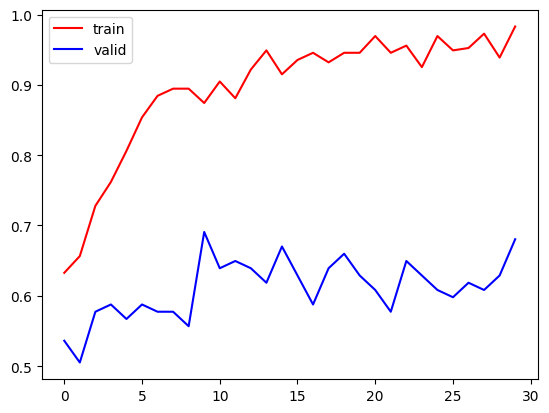

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='valid')
plt.legend()
plt.show()


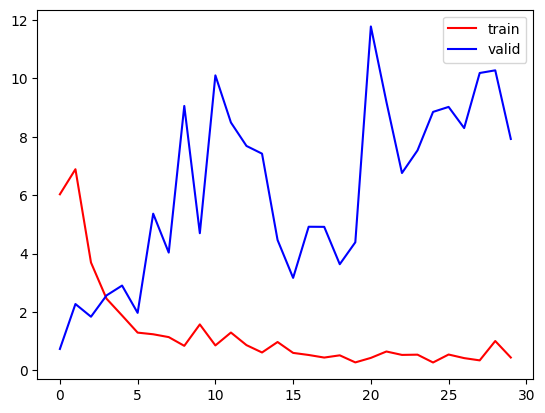

In [24]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='valid')
plt.legend()
plt.show()


model mengalami overfitting

ways to reduce overfitting


*   add more data
*   data augmentation
*   l1/l2 regulazier
* droput
* Batch Norm
* Reduce Complexcity

overfit because the model is powrfull but the data is less, so reduce complexity the model, and that is the issue of custom architecture
so pretend use the trained model or call transfer learning already research



inference the model

In [32]:
import cv2

test_img = cv2.imread('/content/sample_data/apples_tomatoes/test/tomatoes/img_p1_19.jpeg')

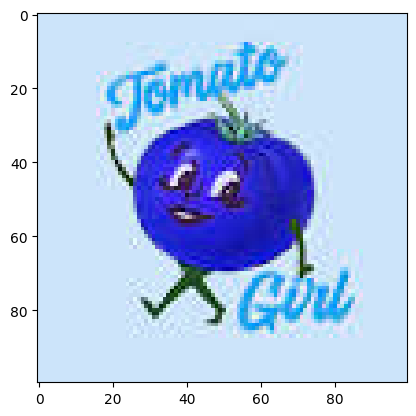

In [33]:
plt.imshow(test_img)

In [34]:
test_img.shape

(100, 100, 3)

In [35]:
test_img = cv2.resize(test_img, (256,256))

In [36]:
test_img.shape

(256, 256, 3)

In [37]:
test_inpt = test_img.reshape(1,256,256,3)

In [38]:
result = model.predict(test_inpt)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[0.]], dtype=float32)

In [40]:
if int(result[0][0]) == 0:
  print('apple')
else:
  print('tomato')

apple
